# Install/Import needed libraries

In [1]:
sc.install_pypi_package("pandas");
sc.install_pypi_package("Matplotlib");
sc.install_pypi_package("seaborn");
sc.install_pypi_package("tqdm");
sc.install_pypi_package("s3fs");
sc.install_pypi_package("scikit-learn");

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
20,application_1596034119790_0021,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/94/b1/f77f49cc7cc538b247f30c2ae7e3a50f29e44f0b1af32ff4869d7de3c762/pandas-1.1.0-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-py2.py3-none-any.whl

  Using cached https://files.pythonhosted.org/packages/1c/15/3fea1bfb7e5b77b7cca9c6010a9cabc58ea125385345ecb6f5832eb8b49a/matplotlib-3.3.0-1-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/8a/bb/488841f56197b13700afd5658fc279a2025a39e22449b7cf29864669b15d/pyparsing-2.4.7-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/e8/f2/6722dd0c22e3a143ac792ccb2424924ac72af4adea756b1165b4cad50da7/Pillow-7.2.0-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
  Using 

In [35]:
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
import s3fs
from sklearn import preprocessing
from sklearn.decomposition import PCA

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Load Data as Pandas DF

## Patient Info

In [3]:
data=pd.read_csv('s3://ms-syntheamass-1m-mldata/syntheamassCSV/output_1/csv/patients.csv')
dataOG=pd.read_csv('s3://ms-syntheamass-1m-mldata/syntheamassCSV/output_1/csv/patients.csv')
#data['BIRTHDATE']=data['BIRTHDATE'].str.replace('-', '')
#data['BIRTHDATE']=data['BIRTHDATE'].astype(float)
data=data.drop(['BIRTHDATE','DEATHDATE','MAIDEN','SSN','DRIVERS','PASSPORT','PREFIX','FIRST','LAST','SUFFIX','BIRTHPLACE','ADDRESS'],axis=1)
data['MARITAL']=data['MARITAL'].fillna(0)
data['MARITAL']=data['MARITAL'].replace({'M':1})
data['MARITAL']=data['MARITAL'].replace({'S':0})
data['GENDER']=data['GENDER'].replace({'M':1})
data['GENDER']=data['GENDER'].replace({'F':0})
data.head()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                                     ID MARITAL   RACE        ETHNICITY GENDER
0  660bec03-9e58-47f2-98b9-2f1c564f3838       0  white            irish      0
1  5125d2b2-3aef-4ae2-aa5c-335f7e206b92       0  white  french_canadian      0
2  26626faf-cbd5-48d5-a3bf-a7b21ae08e4b       1  white            irish      1
3  f509a0f0-77ef-477f-977d-e2784a241b52       1  white           french      0
4  4c763cac-b1df-4bcc-b89c-834942c4d3d6       0  white            irish      0

## Patient Observation

In [4]:
dfm=pd.read_csv('s3://ms-syntheamass-1m-mldata/syntheamassCSV/patient_info/bigObs')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [5]:
dfm.columns=['Patient','Body Mass','Body Height','BMI','Cholesterol']
dfm.head()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                                Patient  Body Mass  ...    BMI  Cholesterol
0  0042d5b6-f461-45d3-8f2a-4b152a719ab8     156.51  ...  29.24        189.0
1  0057dc7b-879d-4ef0-813f-a01583977251     151.11  ...  45.13        182.0
2  00c343e4-e4eb-4c60-8707-65b98c25887e     176.61  ...  37.23        163.0
3  00ceb21f-3c0e-4c16-b497-1af82d621867     166.28  ...  42.91        172.0
4  00e7990c-e3ae-4221-95ed-d0dfb6a2d9d7     171.15  ...  43.57        195.0

[5 rows x 5 columns]

## Merge Patient/Observations

In [6]:
df=pd.concat([data,dfm],axis=1)
df=df.drop(['Patient'],axis=1)
df.head()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                                     ID MARITAL  ...    BMI Cholesterol
0  660bec03-9e58-47f2-98b9-2f1c564f3838       0  ...  29.24       189.0
1  5125d2b2-3aef-4ae2-aa5c-335f7e206b92       0  ...  45.13       182.0
2  26626faf-cbd5-48d5-a3bf-a7b21ae08e4b       1  ...  37.23       163.0
3  f509a0f0-77ef-477f-977d-e2784a241b52       1  ...  42.91       172.0
4  4c763cac-b1df-4bcc-b89c-834942c4d3d6       0  ...  43.57       195.0

[5 rows x 9 columns]

In [7]:
df=df.dropna()
df.shape

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

(65173, 9)

### Copy new DataFrame

In [8]:
dfcopy=df.copy()
dfcopy=dfcopy.dropna()
dfcopy=dfcopy.sample(frac=1, random_state=7896) #Use same random seed later on

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### Encode Categorical Data

In [9]:
enc = preprocessing.OrdinalEncoder()
X=df.iloc[:,2:4].values
enc.fit(X)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

OrdinalEncoder()

In [10]:
X=enc.transform(X)
cols=['RACE','ETHNICITY']
df[cols]=X

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [11]:
df=df.dropna()
df=df.sample(frac=1, random_state=7896) ##same random seed as earlier
df.head()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                                         ID MARITAL  ...    BMI  Cholesterol
24778  984f1708-8028-4619-a3c3-281f372f5237       1  ...  29.82        200.0
8771   22f8214d-fbf7-408f-8951-7b5fda86a15a       0  ...  35.10        192.0
10891  821c074c-50c7-4eb0-b507-460df291016a       0  ...  31.78        192.0
40738  0146bc86-3712-48a2-8c2f-fdfa43d4108d       0  ...  29.40        191.0
61513  cd28385e-b82e-4724-8804-8db5f541d9f6       0  ...  33.78        168.0

[5 rows x 9 columns]

In [12]:
df['MARITAL']=df['MARITAL'].astype(int)
df['GENDER']=df['GENDER'].astype(int)
df.dtypes

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

ID              object
MARITAL          int64
RACE           float64
ETHNICITY      float64
GENDER           int64
Body Mass      float64
Body Height    float64
BMI            float64
Cholesterol    float64
dtype: object

# Convert to Spark DataFrame

In [13]:
sdf=sqlContext.createDataFrame(df)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [14]:
sdf.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-------+----+---------+------+---------+-----------+-----+-----------+
|                  ID|MARITAL|RACE|ETHNICITY|GENDER|Body Mass|Body Height|  BMI|Cholesterol|
+--------------------+-------+----+---------+------+---------+-----------+-----+-----------+
|984f1708-8028-461...|      1| 2.0|     16.0|     0|   182.64|      99.45|29.82|      200.0|
|22f8214d-fbf7-408...|      0| 4.0|     12.0|     0|   162.19|      92.35| 35.1|      192.0|
|821c074c-50c7-4eb...|      0| 4.0|     11.0|     0|   177.83|     100.51|31.78|      192.0|
|0146bc86-3712-48a...|      0| 2.0|      4.0|     1|   190.18|     106.35| 29.4|      191.0|
|cd28385e-b82e-472...|      0| 4.0|     11.0|     1|   168.73|      96.17|33.78|      168.0|
|4e514021-3267-47c...|      1| 4.0|     10.0|     0|   167.58|       91.8|32.69|      165.0|
|d17685d8-1560-45c...|      1| 4.0|     11.0|     1|   166.41|      102.4|36.98|      161.0|
|e8806dad-a003-4b7...|      0| 4.0|      7.0|     0|   181.71|       9

In [15]:
sdf.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

65173

# Prep for Machine Learning

## Indexing Strings

In [16]:
from pyspark.ml.feature import StringIndexer
indexer=StringIndexer(inputCol="ID",outputCol="sID")
indexed= indexer.fit(sdf).transform(sdf)
indexed=indexed.drop("ID")
indexed.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+----+---------+------+---------+-----------+-----+-----------+-------+
|MARITAL|RACE|ETHNICITY|GENDER|Body Mass|Body Height|  BMI|Cholesterol|    sID|
+-------+----+---------+------+---------+-----------+-----+-----------+-------+
|      1| 2.0|     16.0|     0|   182.64|      99.45|29.82|      200.0| 6056.0|
|      0| 4.0|     12.0|     0|   162.19|      92.35| 35.1|      192.0|59814.0|
|      0| 4.0|     11.0|     0|   177.83|     100.51|31.78|      192.0| 9617.0|
|      0| 2.0|      4.0|     1|   190.18|     106.35| 29.4|      191.0|46731.0|
|      0| 4.0|     11.0|     1|   168.73|      96.17|33.78|      168.0|28422.0|
|      1| 4.0|     10.0|     0|   167.58|       91.8|32.69|      165.0|15020.0|
|      1| 4.0|     11.0|     1|   166.41|      102.4|36.98|      161.0|56955.0|
|      0| 4.0|      7.0|     0|   181.71|       97.0|29.38|      200.0|64297.0|
|      1| 4.0|     11.0|     0|   154.44|      99.89|41.88|      164.0|44520.0|
|      1| 2.0|     16.0|     1|   184.98

## Creating Feature Vectors

In [17]:
from pyspark.ml.feature import VectorAssembler
features=('sID','MARITAL','RACE','ETHNICITY','GENDER','Body Mass','Body Height','BMI','Cholesterol')
assembler = VectorAssembler(inputCols=features,outputCol="features")
raw_data=assembler.transform(indexed)
raw_data.select("features").show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------------------------------------------+
|features                                            |
+----------------------------------------------------+
|[6056.0,1.0,2.0,16.0,0.0,182.64,99.45,29.82,200.0]  |
|[59814.0,0.0,4.0,12.0,0.0,162.19,92.35,35.1,192.0]  |
|[9617.0,0.0,4.0,11.0,0.0,177.83,100.51,31.78,192.0] |
|[46731.0,0.0,2.0,4.0,1.0,190.18,106.35,29.4,191.0]  |
|[28422.0,0.0,4.0,11.0,1.0,168.73,96.17,33.78,168.0] |
|[15020.0,1.0,4.0,10.0,0.0,167.58,91.8,32.69,165.0]  |
|[56955.0,1.0,4.0,11.0,1.0,166.41,102.4,36.98,161.0] |
|[64297.0,0.0,4.0,7.0,0.0,181.71,97.0,29.38,200.0]   |
|[44520.0,1.0,4.0,11.0,0.0,154.44,99.89,41.88,164.0] |
|[2899.0,1.0,2.0,16.0,1.0,184.98,107.18,31.32,190.0] |
|[55467.0,1.0,4.0,12.0,0.0,172.8,106.09,35.53,175.0] |
|[44635.0,1.0,0.0,5.0,1.0,166.78,102.05,36.69,161.0] |
|[8039.0,1.0,1.0,20.0,1.0,165.82,102.42,37.25,184.0] |
|[17430.0,0.0,4.0,12.0,0.0,154.61,125.73,52.6,193.0] |
|[33878.0,1.0,4.0,15.0,0.0,161.17,78.65,30.28,195.0] |
|[49273.0,

### Scaling Feature Vectors

In [18]:
from pyspark.ml.feature import StandardScaler
standardScaler=StandardScaler().setInputCol("features").setOutputCol("scaled_features")
raw_data=standardScaler.fit(raw_data).transform(raw_data)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [19]:
raw_data.select("scaled_features").show(5,truncate=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+
|     scaled_features|
+--------------------+
|[0.32188848814152...|
|[3.17923349235421...|
|[0.51116274611245...|
|[2.48384592789655...|
|[1.51068603202747...|
+--------------------+
only showing top 5 rows

# MLLib Algorithmns

#### Defining How many Cluster We Want

In [20]:
K=5

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## K-means

### Fit Data

In [21]:
from pyspark.ml.clustering import KMeans
kmeans= KMeans(featuresCol="scaled_features").setK(K).setSeed(1)
model=kmeans.fit(raw_data)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### Predict

In [22]:
predictions = model.transform(raw_data)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [23]:
clusters=predictions.select("prediction")
clusters.groupby("prediction").agg({'prediction':'count'}).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+-----------------+
|prediction|count(prediction)|
+----------+-----------------+
|         1|            17498|
|         3|             6316|
|         4|            13048|
|         2|            13344|
|         0|            14967|
+----------+-----------------+

## Hierarchical Clustering

### Fit

In [24]:
from pyspark.ml.clustering import BisectingKMeans
bkm=BisectingKMeans(featuresCol="scaled_features").setK(K).setSeed(1)
model=bkm.fit(raw_data)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### Predict

In [25]:
predictions_b = model.transform(raw_data)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [26]:
cm = predictions_b.select("prediction")
cm.groupby("prediction").agg({'prediction':'count'}).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+-----------------+
|prediction|count(prediction)|
+----------+-----------------+
|         1|            15683|
|         3|            10105|
|         4|            16065|
|         2|             7379|
|         0|            15941|
+----------+-----------------+

## Evaluation (Silhouette Score)

In [27]:
from pyspark.ml.evaluation import ClusteringEvaluator
evaluator=ClusteringEvaluator()
silhouette_k=evaluator.evaluate(predictions)
silhouette_h=evaluator.evaluate(predictions_b)
print(f"""K-means silhouette with squared euclidiean distance ={str(silhouette_k)} \n
Hierachical silhouette with sqared euclidiean distance ={str(silhouette_h)}""")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

K-means silhouette with squared euclidiean distance =-0.019308035225861348 

Hierachical silhouette with sqared euclidiean distance =-0.03228660524493888

# PCA Visualization

## Convert Info & Cluster Labels to Pandas

In [28]:
sdff=indexed.drop("sID")
dfp=sdff.toPandas()
dfp.head()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   MARITAL  RACE  ETHNICITY  GENDER  Body Mass  Body Height    BMI  Cholesterol
0        1   2.0       16.0       0     182.64        99.45  29.82        200.0
1        0   4.0       12.0       0     162.19        92.35  35.10        192.0
2        0   4.0       11.0       0     177.83       100.51  31.78        192.0
3        0   2.0        4.0       1     190.18       106.35  29.40        191.0
4        0   4.0       11.0       1     168.73        96.17  33.78        168.0

In [29]:
kclust=clusters.toPandas()
hclust=cm.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Set Up PCA & Transform Info

In [30]:
pca=PCA(n_components=3)
principalComponents=pca.fit_transform(dfp)
principalDF = pd.DataFrame(data=principalComponents, columns =['Principal Component 1', 'Principal Component 2','Principal Component 3'])
principalDF.head()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   Principal Component 1  Principal Component 2  Principal Component 3
0              14.412658               6.426476             -13.878246
1               4.091136              10.215665               7.080247
2               7.881332               1.999553              -8.422815
3               9.748029              -4.502059             -20.564043
4             -15.356244              -4.762942               1.370132

## K-Means

In [39]:
finalDFK=pd.concat([principalDF, kclust],axis=1)
#finalDFK.head()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

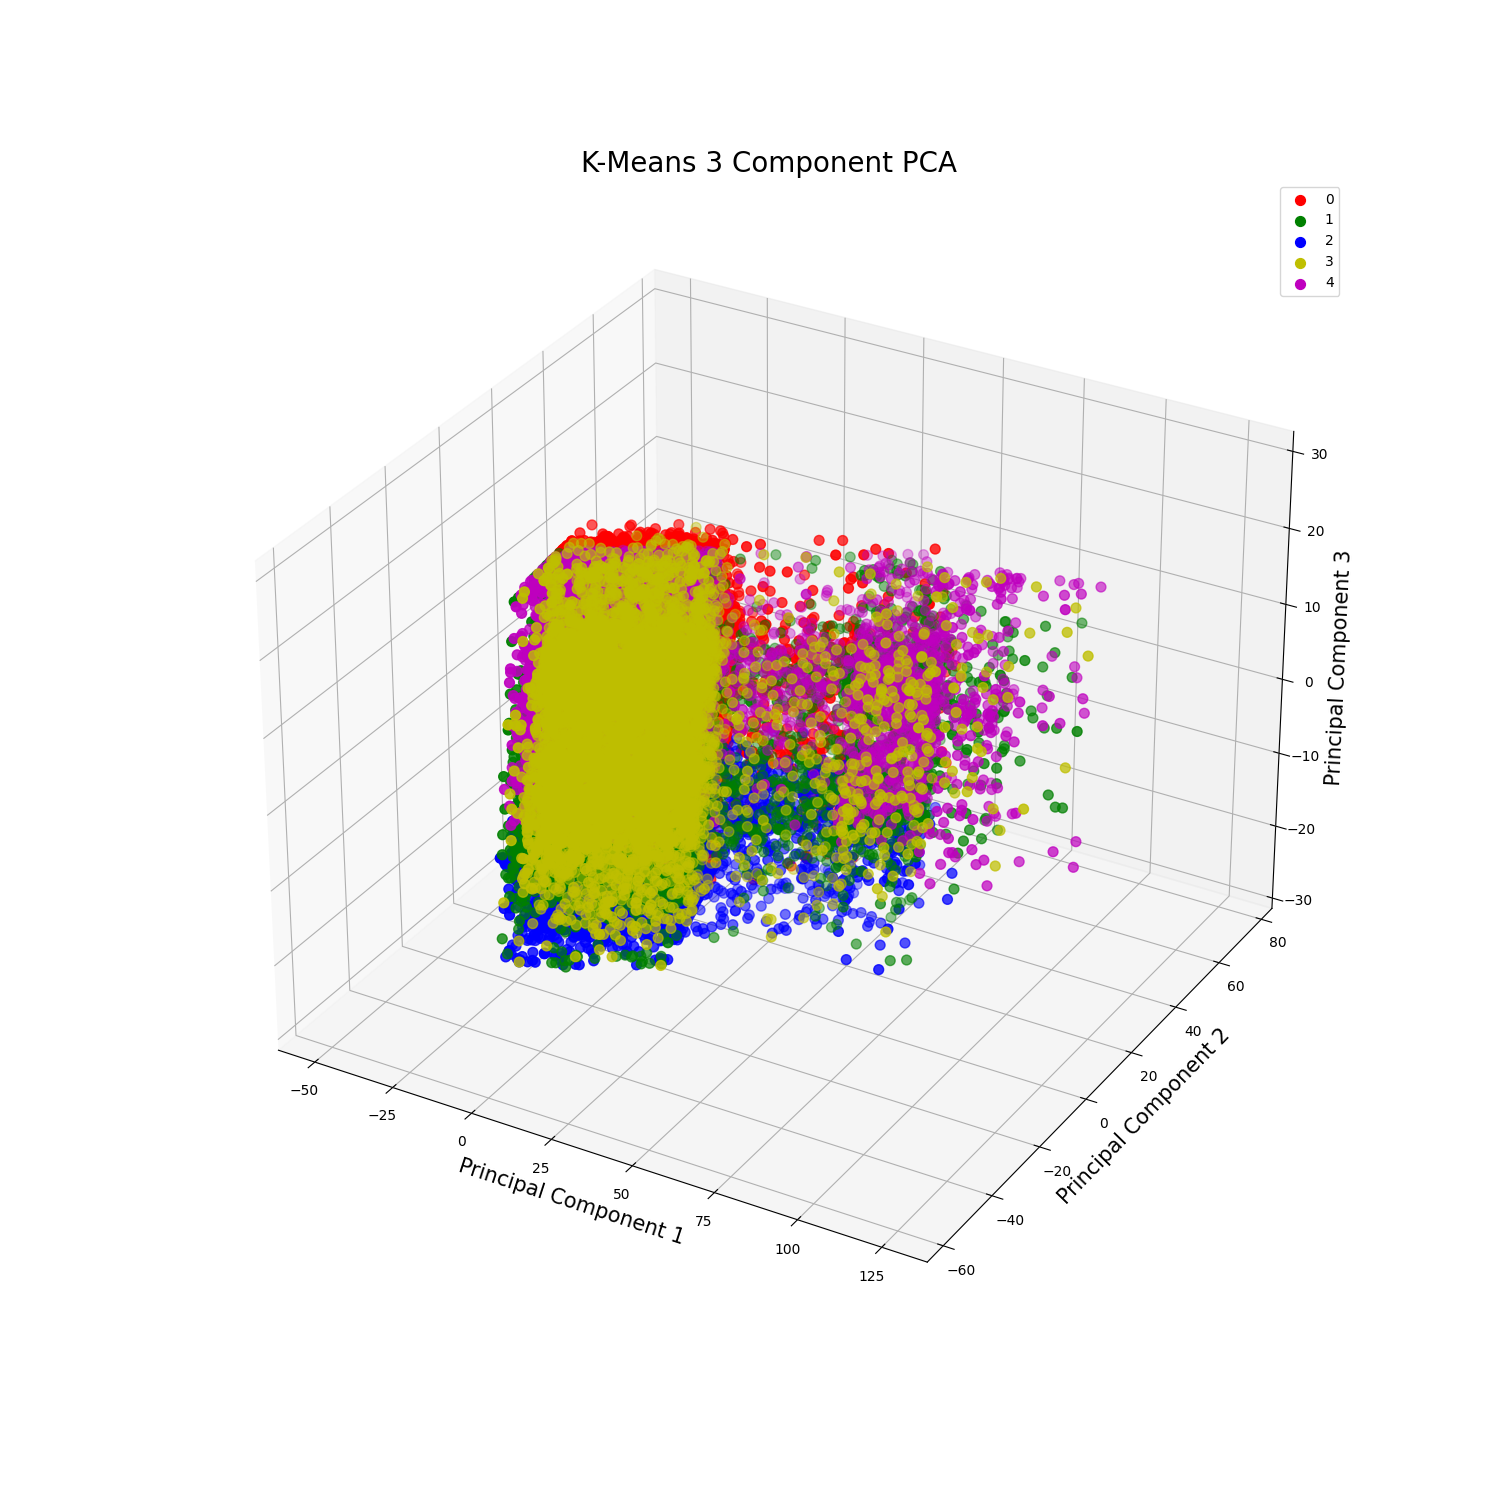

NameError: name 'plt' is not defined

In [42]:
%matplot plt
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111,projection='3d') 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('K-Means 3 Component PCA', fontsize = 20)


targets = [0,1,2,3,4]
colors = ['r', 'g', 'b','y','m']
for target, color in zip(targets,colors):
    indicesToKeep = finalDFK['prediction'] == target
    ax.scatter(finalDFK.loc[indicesToKeep, 'Principal Component 1']
               , finalDFK.loc[indicesToKeep, 'Principal Component 2']
               , finalDFK.loc[indicesToKeep, 'Principal Component 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## Hierarchical

In [43]:
finalDFH=pd.concat([principalDF, hclust],axis=1)
#finalDFH.head()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

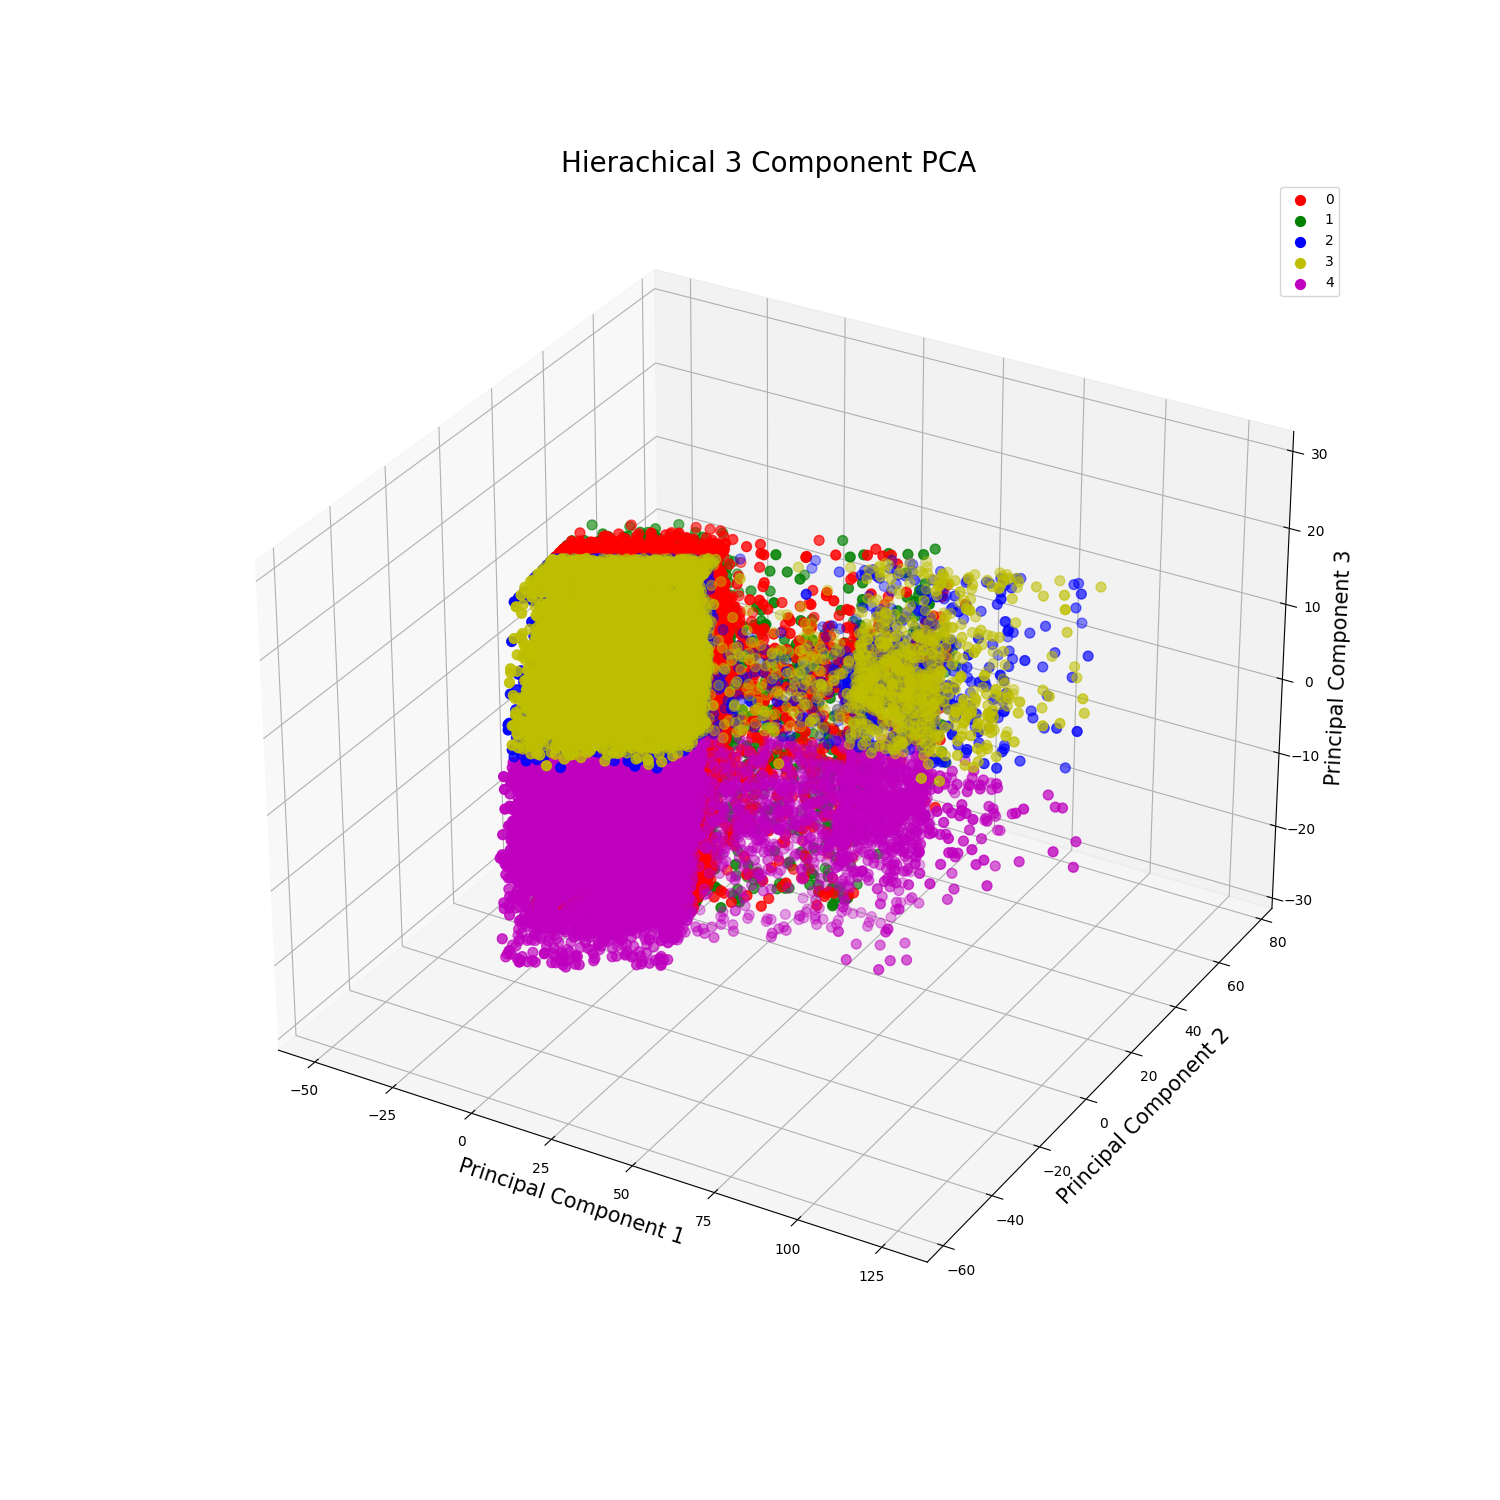

NameError: name 'plt' is not defined

In [45]:
%matplot plt
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111,projection='3d') 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('Hierachical 3 Component PCA', fontsize = 20)


targets = [0,1,2,3,4]
colors = ['r', 'g', 'b','y','m']
for target, color in zip(targets,colors):
    indicesToKeep = finalDFH['prediction'] == target
    ax.scatter(finalDFH.loc[indicesToKeep, 'Principal Component 1']
               , finalDFH.loc[indicesToKeep, 'Principal Component 2']
               , finalDFH.loc[indicesToKeep, 'Principal Component 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()